In [ ]:
# Intercorrelation: Analysis among Airbnb Features

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
all_data = {}

for c in ['nyc']:
    file = '../../Data/data_'+c+'.csv'
    
    data = pd.read_csv(file)
    data = data[data['disadvantaged']==True]
    data = data[data['count_listings']>=5]
    
    if c == 'london':
        data['LDA Component (Check-In)'] = data['lda_5']
        data['LDA Component (Listing)'] = data['lda_2']
        data['LDA Component (Stay/Host)'] = data['lda_4']
        data['LDA Component (Location)'] = data['lda_3']
        data['LDA Component (Public Transport)'] = data['lda_1']
    if c == 'nyc':
        data['LDA Component (Check-In)'] = data['lda_1']
        data['LDA Component (Listing)'] = data['lda_2']
        data['LDA Component (Stay/Host)'] = data['lda_3']
        data['LDA Component (Location)'] = data['lda_4']
        data['LDA Component (Public Transport)'] = data['lda_5']
    if c == 'la':
        data['LDA Component (Check-In)'] = data['lda_2']
        data['LDA Component (Listing)'] = data['lda_3']
        data['LDA Component (Stay/Host)'] = data['lda_5']
        data['LDA Component (Location)'] = data['lda_1']
        data['LDA Component (Public Transport)'] = np.nan

    # Best DTV
    dtv_features = {}
    for f in data.columns:
        if 'dtv' in f and 'std' not in f and 'pca' not in f:
            dtv_features[f] = abs(stats.pearsonr(data[f], data['index_change'])[0])
    dtv_features = {k: v for k, v in sorted(dtv_features.items(), key=lambda item: item[1], reverse=True)}

    dtv_feature = list(dtv_features.keys())[0]
    data['D2V Component (1)'] = data[dtv_feature]
    
    sf = [
    'count_listings',
    'count_reviews',
    'price',
    'bedrooms',
    'star_rating', 
    'review_rating_location',
    ]
    
    uf = [
    'review_len',
    'location_words_perc',
    'sent_comp','sent_comp_location',
    'LDA Component (Check-In)', 'LDA Component (Listing)', 'LDA Component (Location)', 'LDA Component (Stay/Host)', 
    'LDA Component (Public Transport)', 'D2V Component (1)',
    ]
    data = data[sf+uf]
    
    mapper = {
    'count_listings': '# Listings',
    'count_reviews': '# Reviews',
    'price': 'Price',
    'bedrooms': '# Bedrooms',
    'star_rating': 'Star-Rating', 
    'review_rating_location': 'Location Star-Rating',
    'review_len': 'Review Length',
    'location_words_perc': 'Location Words',
    'sent_comp': 'Sentiment',
    'sent_comp_location': 'Sentiment in Location Reviews'
    }
    
    data = data.rename(columns=mapper)
    
    all_data[c] = data

In [38]:
corr_df = all_data['nyc'].corr(method='pearson')

In [39]:
corr_df

,# Listings,# Reviews,Price,# Bedrooms,Star-Rating,Location Star-Rating,Review Length,Location Words,Sentiment,Sentiment in Location Reviews,LDA Component (Check-In),LDA Component (Listing),LDA Component (Location),LDA Component (Stay/Host),LDA Component (Public Transport),D2V Component (1)
# Listings,1.000000,0.990348,0.488126,0.079338,0.048385,0.271678,0.446910,0.378119,0.391885,0.458473,-0.004700,-0.298142,0.436427,-0.168328,-0.172611,-0.721140
# Reviews,0.990348,1.000000,0.487995,0.095710,0.027795,0.242984,0.431825,0.373091,0.375190,0.425928,-0.017093,-0.268495,0.405550,-0.182157,-0.136222,-0.695542
Price,0.488126,0.487995,1.000000,0.297557,0.216624,0.495109,0.541777,0.505362,0.241502,0.449728,0.267021,-0.419352,0.656914,-0.325970,-0.307752,-0.620422
# Bedrooms,0.079338,0.095710,0.297557,1.000000,0.090404,0.151612,0.068352,0.211006,0.174611,0.095914,-0.123544,-0.100362,0.244165,-0.188343,0.004571,-0.104327
Star-Rating,0.048385,0.027795,0.216624,0.090404,1.000000,0.549966,0.181397,0.003818,0.571799,0.547026,-0.134057,-0.568403,0.342136,0.401754,-0.368965,-0.111083
Location Star-Rating,0.271678,0.242984,0.495109,0.151612,0.549966,1.000000,0.280685,0.248461,0.413294,0.447275,-0.031016,-0.439823,0.494667,0.110971,-0.407446,-0.398842
Review Length,0.446910,0.431825,0.541777,0.068352,0.181397,0.280685,1.000000,0.400501,0.585891,0.756276,-0.048465,-0.384450,0.532744,-0.383890,-0.004769,-0.447381
Location Words,0.378119,0.373091,0.505362,0.211006,0.003818,0.248461,0.400501,1.000000,0.288291,0.360316,0.060165,-0.465943,0.528346,-0.460615,0.100994,-0.637171
Sentiment,0.391885,0.375190,0.241502,0.174611,0.571799,0.413294,0.585891,0.288291,1.000000,0.844685,-0.448657,-0.619770,0.497121,0.170252,-0.181008,-0.372982
Sentiment in Location Reviews,0.458473,0.425928,0.449728,0.095914,0.547026,0.447275,0.756276,0.360316,0.844685,1.000000,-0.024921,-0.694856,0.630403,0.017458,-0.309730,-0.484601


In [40]:
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

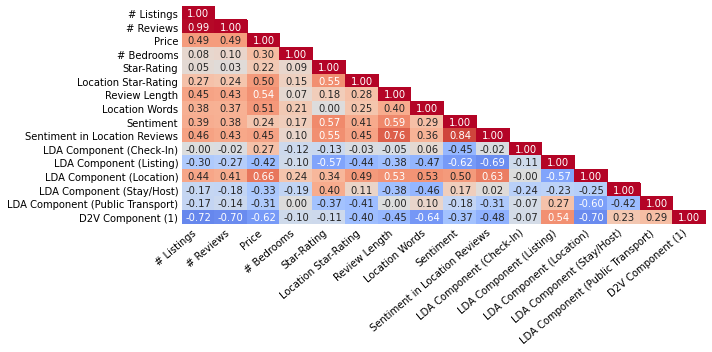

In [41]:
plt.rcParams["figure.figsize"] = [10,5]

fig, ax = plt.subplots()
sns.heatmap(df_lt, annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, vmin=-1, vmax=1, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.tick_params(axis=u'both', which=u'both',length=0)

fig.tight_layout()

plt.show()

fig.savefig('intercorr_nyc.eps', format='eps', dpi=1000, bbox_inches='tight', pad_inches=0.1)